<a href="https://colab.research.google.com/github/KalyaniVijayPakhale/Statistics/blob/main/Activity_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [683]:
# importing required liberaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [684]:
df = pd.read_csv('/content/sample_data/user_purchase_behavior.csv') # data upload

In [685]:
df.head() # data reading top 5 records

UserID  Gender  Age JoiningDate  Location  OrderQuantity  TotalOrderValue  \
0       1   woman   30  29-10-2023  Suburban              5           166.38   
1       2  Female   41  22-07-2020  Suburban              9           200.62   
2       3  Female   38  06-02-2023     Rural              6           824.63   
3       4    Male   62  14-02-2018  Suburban              8           371.29   
4       5    Male   60  24-02-2020  Suburban              5           998.11   

   DiscountApplied    Target  
0            11.52   Premium  
1            12.97  Economic  
2            21.65  Economic  
3             6.95  Economic  
4            20.69   Premium

Data Understanding

In [686]:
df.columns # get column names

Index(['UserID', 'Gender', 'Age', 'JoiningDate', 'Location', 'OrderQuantity',
       'TotalOrderValue', 'DiscountApplied', 'Target'],
      dtype='object')

In [687]:
# get column data types
df.dtypes

UserID               int64
Gender              object
Age                  int64
JoiningDate         object
Location            object
OrderQuantity        int64
TotalOrderValue    float64
DiscountApplied    float64
Target              object
dtype: object

UserID: This column represents user IDs and is of type int64, which typically means it stores integer values.

Gender: This column represents the gender of users and is of type object, indicating it likely stores string values.

Age: This column represents the age of users and is of type int64, storing integer values.

JoiningDate: This column represents the joining date of users and is of type object, which could potentially store date values but is currently stored as a string.

Location: This column represents the location of users and is of type object, likely storing string values.

OrderQuantity: This column represents the quantity of orders and is of type int64, storing integer values.

TotalOrderValue: This column represents the total value of orders and is of type float64, indicating it stores floating-point numeric values.

DiscountApplied: This column represents the discount applied to orders and is of type float64, similarly storing floating-point numeric values.

Target: This column represents some target variable and is of type object, indicating it likely stores string values.

In [688]:
# data dimensions
df.shape

(5000, 9)

In [689]:
# 5000 rows and 9 column

df.info() # getting info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UserID           5000 non-null   int64  
 1   Gender           5000 non-null   object 
 2   Age              5000 non-null   int64  
 3   JoiningDate      5000 non-null   object 
 4   Location         5000 non-null   object 
 5   OrderQuantity    5000 non-null   int64  
 6   TotalOrderValue  5000 non-null   float64
 7   DiscountApplied  5000 non-null   float64
 8   Target           5000 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 351.7+ KB


Data Cleaning

In [690]:
# checking for any duplicate record

df.duplicated().sum()

0

No duplicate entries ae found in the dataset

In [691]:
# check for missing values

df.isnull().sum()

UserID             0
Gender             0
Age                0
JoiningDate        0
Location           0
OrderQuantity      0
TotalOrderValue    0
DiscountApplied    0
Target             0
dtype: int64

Each record is present, no null value present in the dataset. Hence there is no need to impute the data with fillers such as, mean, median, and mode

## EDA: Exploratory Data Analysis

In [692]:
# getting unique values for each column

for column in df.columns:
  nunique = df[column].nunique()
  print(column,":", nunique)

UserID : 5000
Gender : 8
Age : 81
JoiningDate : 1965
Location : 3
OrderQuantity : 9
TotalOrderValue : 4868
DiscountApplied : 2178
Target : 2


In [693]:
# getting value_counts for each column in the dataset
for column in df.columns:
  value_counts = df[column].value_counts().head(5)
  print(column,":", value_counts)

UserID : 1       1
3331    1
3338    1
3337    1
3336    1
Name: UserID, dtype: int64
Gender : Female    2498
Male      2452
girl        11
woman       10
F           10
Name: Gender, dtype: int64
Age : 34    122
24    116
53    111
65    108
69    107
Name: Age, dtype: int64
JoiningDate : 31-05-2018    8
19-09-2018    8
02-10-2019    7
28-01-2019    7
07-05-2019    7
Name: JoiningDate, dtype: int64
Location : Urban       1750
Rural       1649
Suburban    1601
Name: Location, dtype: int64
OrderQuantity : 5    591
3    586
6    577
9    567
7    557
Name: OrderQuantity, dtype: int64
TotalOrderValue : 103.90    3
340.13    3
278.87    2
726.53    2
889.07    2
Name: TotalOrderValue, dtype: int64
DiscountApplied : 27.23    7
28.05    7
10.06    7
25.26    7
10.27    7
Name: DiscountApplied, dtype: int64
Target : Economic    4030
Premium      970
Name: Target, dtype: int64


# **Univariate** **Analysis**

In [694]:
#  Customer's gender (including standard and non-standard representations)
# converting non standards into standarzes form for better analysis
df['Gender'].value_counts()

Female    2498
Male      2452
girl        11
woman       10
F           10
boy          9
M            7
man          3
Name: Gender, dtype: int64

In [695]:
# replacing other values with F and M for Females and Male respectively
df['Gender'] = df['Gender'].replace({'Female': 'F', 'girl': 'F', 'woman': 'F', 'Male': 'M', 'man': 'M', 'boy': 'M'})

In [696]:
df['Gender']

0       F
1       F
2       F
3       M
4       M
       ..
4995    F
4996    F
4997    F
4998    M
4999    F
Name: Gender, Length: 5000, dtype: object

In [697]:
df['Gender'].value_counts() #checking whether it is replaced no not

F    2529
M    2471
Name: Gender, dtype: int64

Now, Gender column has been standardized form

In [698]:
# JoiningDate: The date when the customer joined the e-commerce platform
df['JoiningDate'].head()

0    29-10-2023
1    22-07-2020
2    06-02-2023
3    14-02-2018
4    24-02-2020
Name: JoiningDate, dtype: object

In [699]:
df['JoiningDate'].dtypes

dtype('O')

# Data Enrichment

Now, converting date column into date data types, and enriching multiple variables on ot such as, year, month, day, weekday, whether is weekend or not?bold text

In [700]:
# First, convert the 'JoiningDate' column to datetime format
df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])


<ipython-input-700-8b29ff73983a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])


In [701]:
df['JoiningDate'].dtypes

dtype('<M8[ns]')

In [702]:
df['JoiningDate'].head()

0   2023-10-29
1   2020-07-22
2   2023-06-02
3   2018-02-14
4   2020-02-24
Name: JoiningDate, dtype: datetime64[ns]

In [703]:
# Now we can perform EDA
# For example, extract year, month, or day from the 'JoiningDate' column
df['JoiningYear'] = df['JoiningDate'].dt.year
df['JoiningMonth']=df['JoiningDate'].dt.month
df['JoiningDay']=df['JoiningDate'].dt.day

In [704]:
# Mapping for months
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Map 'JoiningMonth' and 'JoiningDay' columns
df['JoiningMonth'] = df['JoiningMonth'].map(month_map)

In [705]:
df[['JoiningDate','JoiningYear','JoiningMonth','JoiningDay']]

JoiningDate  JoiningYear JoiningMonth  JoiningDay
0     2023-10-29         2023      October          29
1     2020-07-22         2020         July          22
2     2023-06-02         2023         June           2
3     2018-02-14         2018     February          14
4     2020-02-24         2020     February          24
...          ...          ...          ...         ...
4995  2019-10-31         2019      October          31
4996  2021-12-08         2021     December           8
4997  2019-07-08         2019         July           8
4998  2019-12-19         2019     December          19
4999  2018-05-20         2018          May          20

[5000 rows x 4 columns]

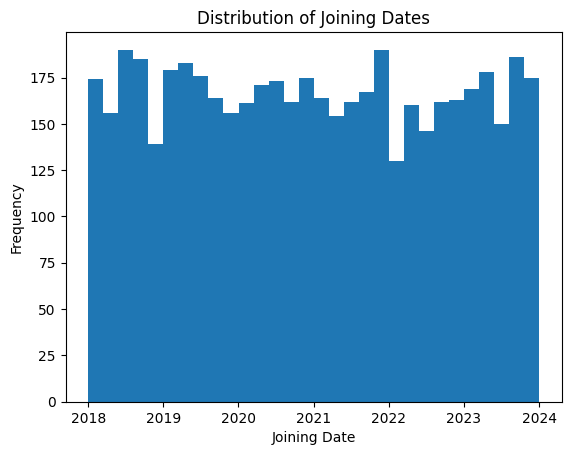

In [706]:
#visualize the distribution of joining dates
import matplotlib.pyplot as plt
plt.hist(df['JoiningDate'], bins=30)
plt.xlabel('Joining Date')
plt.ylabel('Frequency')
plt.title('Distribution of Joining Dates')
plt.show()

We can see that, we have data of 2018 till 2024 year. we can see that the distribution is quiet fluctuating.

We converted the 'JoiningDate' column to datetime format using pd.to_datetime().
Then we performed various EDA tasks such as extracting year, month, and day from the 'JoiningDate' column, and checking summary statistics.
We also visualized the distribution of joining dates using a histogram.

In [707]:
# Create a new column for day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
df['JoiningDayOfWeek'] = df['JoiningDate'].dt.dayofweek
df['JoiningDayOfWeek']

#DayOfWeek: This column will contain integers representing the day of the week, where 0 is Monday, 1 is Tuesday, and so on, up to 6 for Sunday.

0       6
1       2
2       4
3       2
4       0
       ..
4995    3
4996    2
4997    0
4998    3
4999    6
Name: JoiningDayOfWeek, Length: 5000, dtype: int64

In [708]:
# Create a new column indicating whether it's a weekend (Saturday or Sunday)
df['IsWeekend'] = df['JoiningDayOfWeek'].isin([5,6]).astype(int)

IsWeekend: This column will indicate whether the corresponding date falls on a weekend (Saturday or Sunday) with 1 for True and 0 for False.

In [709]:
df['IsWeekend']

0       1
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: IsWeekend, Length: 5000, dtype: int64

In [710]:
#Create a mapping dictionary
day_mapping = {0: 'Monday', 1: 'Monday', 2: 'Monday', 3: 'Monday', 4: 'Monday', 5: 'Sunday', 6: 'Sunday'}
df['JoiningDayOfWeek'] = df['JoiningDayOfWeek'].map(day_mapping)
df['JoiningDayOfWeek']

0       Sunday
1       Monday
2       Monday
3       Monday
4       Monday
         ...  
4995    Monday
4996    Monday
4997    Monday
4998    Monday
4999    Sunday
Name: JoiningDayOfWeek, Length: 5000, dtype: object

In [711]:
df.head()

UserID Gender  Age JoiningDate  Location  OrderQuantity  TotalOrderValue  \
0       1      F   30  2023-10-29  Suburban              5           166.38   
1       2      F   41  2020-07-22  Suburban              9           200.62   
2       3      F   38  2023-06-02     Rural              6           824.63   
3       4      M   62  2018-02-14  Suburban              8           371.29   
4       5      M   60  2020-02-24  Suburban              5           998.11   

   DiscountApplied    Target  JoiningYear JoiningMonth  JoiningDay  \
0            11.52   Premium         2023      October          29   
1            12.97  Economic         2020         July          22   
2            21.65  Economic         2023         June           2   
3             6.95  Economic         2018     February          14   
4            20.69   Premium         2020     February          24   

  JoiningDayOfWeek  IsWeekend  
0           Sunday          1  
1           Monday          0  
2           Monday          0  
3           Monday          0  
4           Monday          0

In [712]:
df['JoiningDay'].value_counts()

10    195
23    191
26    184
18    182
15    182
9     173
4     172
19    171
12    171
29    170
6     169
3     167
25    167
28    165
13    164
20    164
16    161
1     160
17    159
5     156
2     153
24    152
8     151
11    150
14    146
7     145
22    143
30    142
21    141
27    141
31    113
Name: JoiningDay, dtype: int64

In [713]:
bins = [0, 7, 15, 22, 29, 31]
labels = ['first week', 'second week', 'third week', 'fourth week', 'fifth week']

# Bin the 'JoiningDay' column
df['JoiningWeek'] = pd.cut(df['JoiningDay'], bins=bins, labels=labels, right=False)
df['JoiningWeek'].head()

0     fifth week
1    fourth week
2     first week
3    second week
4    fourth week
Name: JoiningWeek, dtype: category
Categories (5, object): ['first week' < 'second week' < 'third week' < 'fourth week' < 'fifth week']

In [714]:
df.head()

UserID Gender  Age JoiningDate  Location  OrderQuantity  TotalOrderValue  \
0       1      F   30  2023-10-29  Suburban              5           166.38   
1       2      F   41  2020-07-22  Suburban              9           200.62   
2       3      F   38  2023-06-02     Rural              6           824.63   
3       4      M   62  2018-02-14  Suburban              8           371.29   
4       5      M   60  2020-02-24  Suburban              5           998.11   

   DiscountApplied    Target  JoiningYear JoiningMonth  JoiningDay  \
0            11.52   Premium         2023      October          29   
1            12.97  Economic         2020         July          22   
2            21.65  Economic         2023         June           2   
3             6.95  Economic         2018     February          14   
4            20.69   Premium         2020     February          24   

  JoiningDayOfWeek  IsWeekend  JoiningWeek  
0           Sunday          1   fifth week  
1           Monday          0  fourth week  
2           Monday          0   first week  
3           Monday          0  second week  
4           Monday          0  fourth week

In [715]:
df[['JoiningWeek','Gender']].value_counts()/len(df)*100

JoiningWeek  Gender
second week  F         13.14
             M         12.76
third week   F         12.06
fourth week  M         11.68
             F         11.18
third week   M         11.14
first week   M          9.80
             F          9.74
fifth week   M          3.22
             F          3.02
dtype: float64

In [716]:
# Location: Customer's location categorized into Urban, Suburban, or Rural
df['Location'].value_counts()

Urban       1750
Rural       1649
Suburban    1601
Name: Location, dtype: int64

In [717]:
# OrderQuantity: Number of items purchased in a transaction
df['OrderQuantity'].value_counts()

5    591
3    586
6    577
9    567
7    557
8    551
4    538
2    524
1    509
Name: OrderQuantity, dtype: int64

In [718]:
#TotalOrderValue: Total value of the transaction
df['TotalOrderValue'].value_counts()

103.90    3
340.13    3
278.87    2
726.53    2
889.07    2
         ..
740.00    1
809.72    1
394.23    1
391.48    1
939.12    1
Name: TotalOrderValue, Length: 4868, dtype: int64

In [719]:
# DiscountApplied: Percentage of discount applied to the transaction
df['DiscountApplied'].value_counts()

27.23    7
28.05    7
10.06    7
25.26    7
10.27    7
        ..
26.98    1
28.56    1
5.61     1
22.30    1
24.01    1
Name: DiscountApplied, Length: 2178, dtype: int64

In [720]:
# Amount_after_discount creating this variable as prze after applying discount percentages on TotalOrderValue

df['Amount_after_discount'] = df['TotalOrderValue'] - (df['DiscountApplied']*df['TotalOrderValue']/100)
df['Amount_after_discount']

0       147.213024
1       174.599586
2       646.097605
3       345.485345
4       791.601041
           ...    
4995    253.255975
4996    400.517950
4997    652.422450
4998    194.828562
4999    826.331688
Name: Amount_after_discount, Length: 5000, dtype: float64

In [721]:
df[['DiscountApplied','Amount_after_discount','TotalOrderValue']]

DiscountApplied  Amount_after_discount  TotalOrderValue
0               11.52             147.213024           166.38
1               12.97             174.599586           200.62
2               21.65             646.097605           824.63
3                6.95             345.485345           371.29
4               20.69             791.601041           998.11
...               ...                    ...              ...
4995            17.75             253.255975           307.91
4996            28.67             400.517950           561.50
4997             8.50             652.422450           713.03
4998            10.18             194.828562           216.91
4999            12.01             826.331688           939.12

[5000 rows x 3 columns]

In [722]:
df['discount_prize'] = df['TotalOrderValue']-df['Amount_after_discount']
df['discount_prize']

0        19.166976
1        26.020414
2       178.532395
3        25.804655
4       206.508959
           ...    
4995     54.654025
4996    160.982050
4997     60.607550
4998     22.081438
4999    112.788312
Name: discount_prize, Length: 5000, dtype: float64

In [723]:
df[['DiscountApplied','Amount_after_discount','TotalOrderValue','discount_prize']]

DiscountApplied  Amount_after_discount  TotalOrderValue  discount_prize
0               11.52             147.213024           166.38       19.166976
1               12.97             174.599586           200.62       26.020414
2               21.65             646.097605           824.63      178.532395
3                6.95             345.485345           371.29       25.804655
4               20.69             791.601041           998.11      206.508959
...               ...                    ...              ...             ...
4995            17.75             253.255975           307.91       54.654025
4996            28.67             400.517950           561.50      160.982050
4997             8.50             652.422450           713.03       60.607550
4998            10.18             194.828562           216.91       22.081438
4999            12.01             826.331688           939.12      112.788312

[5000 rows x 4 columns]

In [724]:
# Target: Classification target variable with two classes - Premium and Economic, indicating the customer segment
df['Target'].value_counts()/len(df)*100 # percnetage of distibution

Economic    80.6
Premium     19.4
Name: Target, dtype: float64

The given data appears to represent a product distribution, with "Economic" and "Premium" categories having respective percentages of 80.6% and 19.4%.

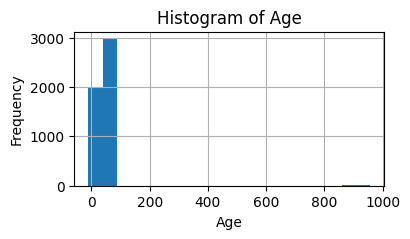

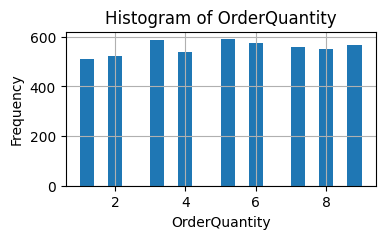

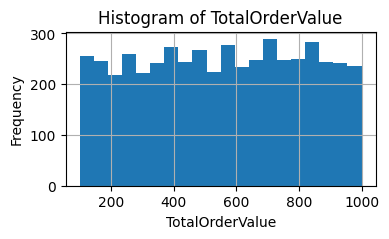

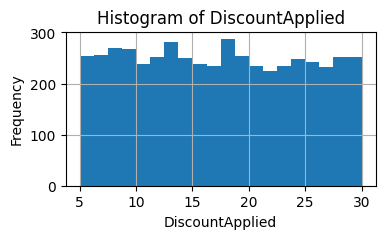

In [725]:
# For simplicity, let's assume you have only numeric columns in your dataset
numeric_cols = ['Age', 'OrderQuantity', 'TotalOrderValue', 'DiscountApplied']

# Plot histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(4, 2))
    plt.hist(df[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [726]:
# Age: Customer's age (contains anomalies to be cleaned)
df['Age'].value_counts()

34     122
24     116
53     111
65     108
69     107
      ... 
851      1
869      1
953      1
717      1
906      1
Name: Age, Length: 81, dtype: int64

We can see that there are anamolies present in the dataset. We have to handle those anamolies

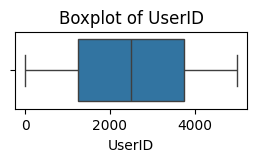

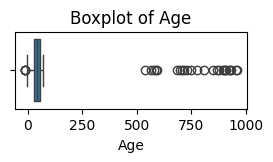

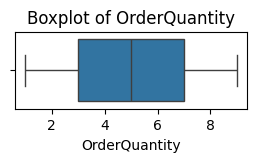

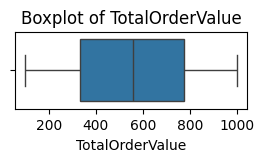

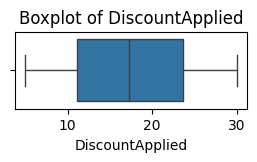

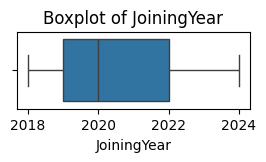

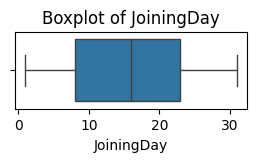

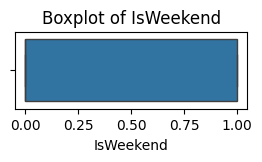

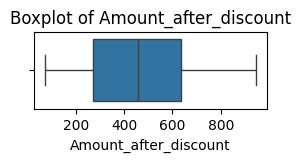

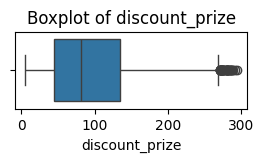

In [727]:
# Plot box plots for each numeric column
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(3, 1))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

Handling anomalies in a dataset involves identifying and addressing any irregularities or outliers that may exist in the data. Here's a generalized approach to handle anomalies:

Identify Anomalies:

Use statistical methods (e.g., z-score, IQR) or visualization techniques (e.g., box plots, scatter plots) to detect outliers or anomalies in the dataset.
Look for values that are significantly different from the rest of the data.
Understand the Context:

Investigate the anomalies to understand whether they are errors in data collection, data entry mistakes, or genuinely unusual occurrences.
Contextual understanding of the dataset and domain knowledge is essential for accurately identifying anomalies.
Handle Anomalies:

Depending on the nature of the anomalies and the context of the data, you can choose one of several strategies:
Remove Anomalies: If anomalies are due to data entry errors or outliers that do not represent genuine data points, consider removing them from the dataset.
Impute Values: Replace anomalies with more appropriate values. This could involve using the mean, median, or mode of the data, or using predictive modeling techniques to impute missing values.
Transform Data: Apply data transformation techniques such as log transformation to reduce the impact of outliers.
Segment Data: If anomalies represent distinct groups or categories, consider segmenting the data and analyzing each segment separately.
Monitor and Iterate:

After handling anomalies, it's important to monitor the effects of your actions and iterate if necessary.
Reevaluate the data and check for any new anomalies that may have emerged as a result of data processing or changes in the dataset.

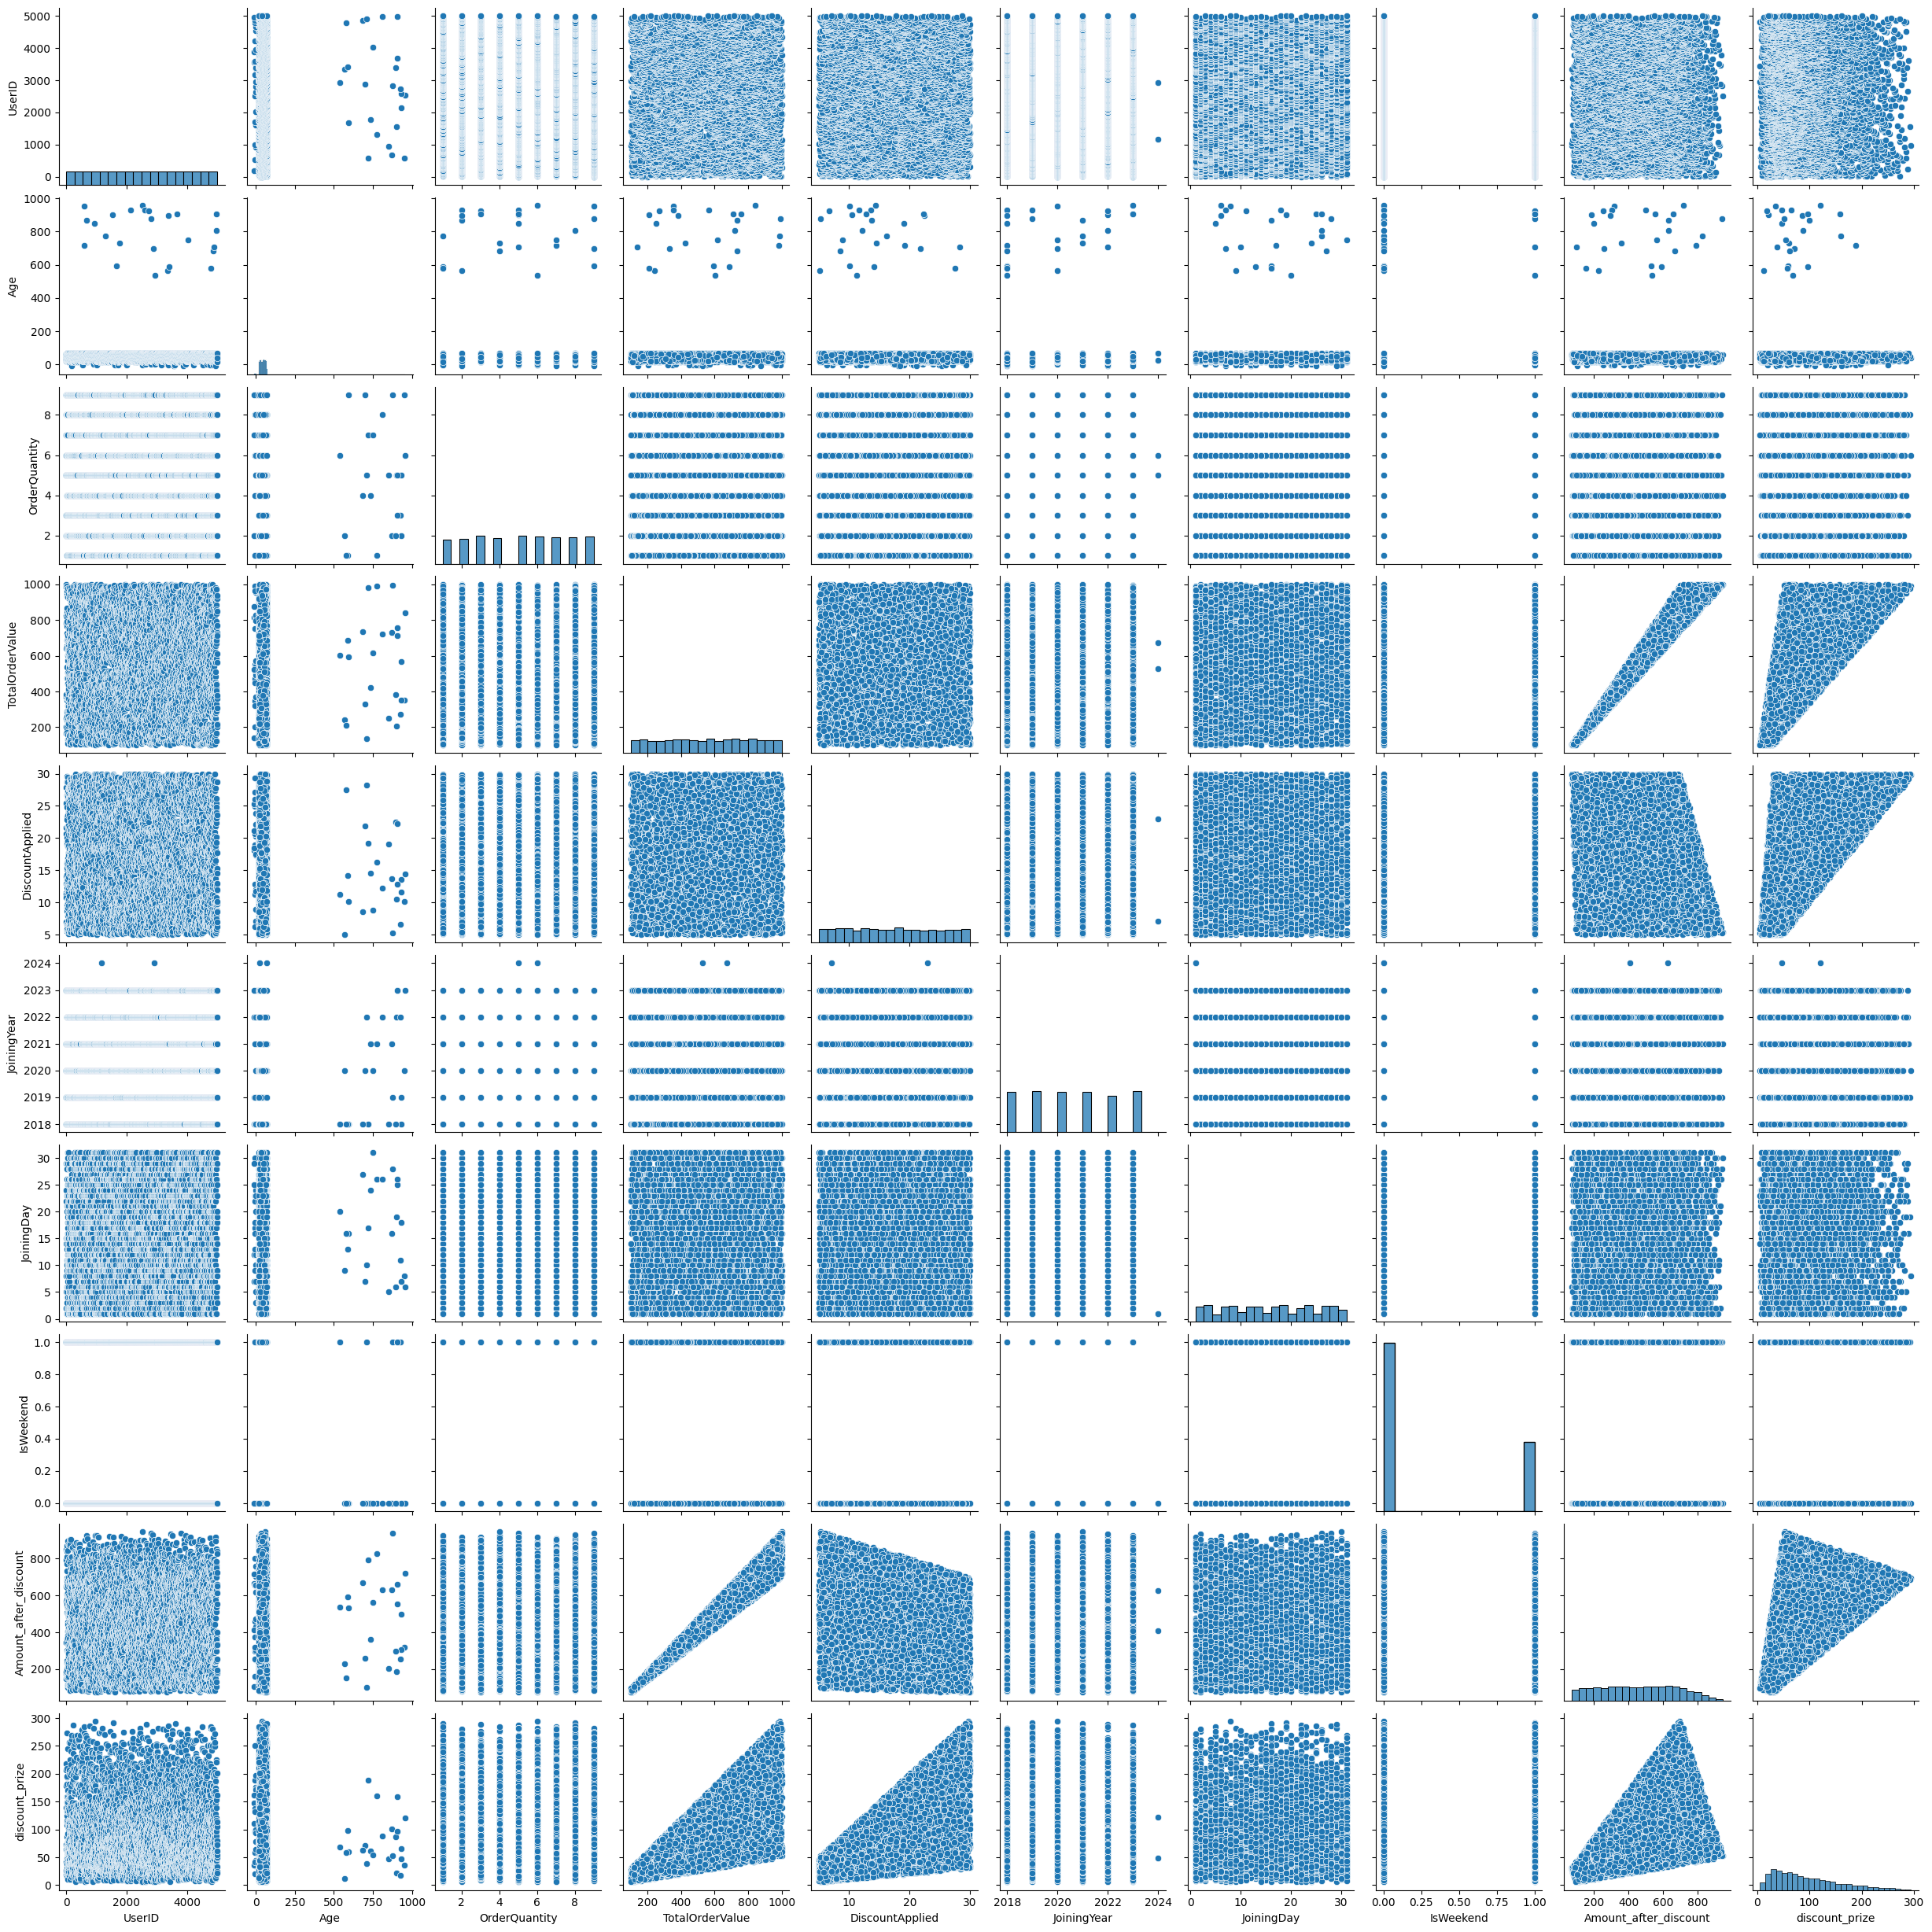

In [728]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Creating scatter plots for all pairs of numeric columns
sns.pairplot(df[numeric_cols])
plt.show()

# Handling Ouliers/ Anamolies in Age column

*   List item
*   List item



In [729]:
# Calculate the IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

In [730]:
Q1,Q3

(31.0, 57.0)

In [731]:
# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

In [732]:
# Remove outliers
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

this code calculates the IQR and then identifies outliers as observations that fall below the lower bound or above the upper bound.

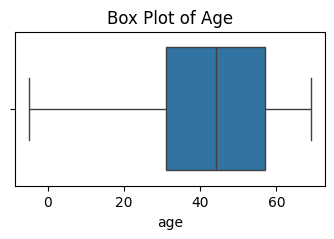

In [733]:
# Assuming df is your DataFrame
plt.figure(figsize=(4,2))
sns.boxplot(x='Age', data=df)
plt.title('Box Plot of Age')
plt.xlabel('age')
plt.show()

Now, Age column has been cleaned and we have handled outliers

We define the age bins as [30, 35, 40, 45, 50, 55, float('inf')], which represent the boundaries for each age bucket.
We define the labels for the bins as ['30-35 yrs', '36-40 yrs', '41-45 yrs', '46-50 yrs', '51-55 yrs', 'More than 55 yrs'].


In [734]:
age_bins = [10, 20, 30, 35, 40, 45, 50, 55, float('inf')]

# Define the labels for the bins
age_labels = ['less than 20yrs','20 to 30 yrs','30 to 35 yrs', '36 to 40 yrs', '41 to 45 yrs', '46 to 50 yrs', '51 to 55 yrs', 'More than 55 yrs']

# Create a new column 'AgeBucket' based on the bins
df['AgeBucket'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


In [735]:
df['AgeBucket'].value_counts()

More than 55 yrs    1454
20 to 30 yrs         945
51 to 55 yrs         512
30 to 35 yrs         503
46 to 50 yrs         473
36 to 40 yrs         455
41 to 45 yrs         438
less than 20yrs      170
Name: AgeBucket, dtype: int64

In [736]:
df['AgeBucket'].isnull().sum() # checking for nulls

21

In [737]:
# imputing missing values with mode

df['AgeBucket'] = df['AgeBucket'].fillna(df['AgeBucket'].mode().iloc[0])

In [738]:
df['AgeBucket'].isnull().sum() # checking for nulls

0

In [739]:
df['Age'].value_counts()

 34    122
 24    116
 53    111
 65    108
 69    107
 51    106
 56    105
 28    103
 45    103
 63    102
 30    102
 62    102
 50    101
 67    101
 44    100
 61    100
 49    100
 27    100
 52     99
 29     99
 20     98
 35     97
 64     97
 33     97
 32     96
 54     95
 21     94
 46     94
 38     94
 55     93
 57     93
 39     93
 42     93
 59     93
 68     92
 47     92
 19     91
 60     90
 25     89
 41     88
 36     87
 58     86
 31     86
 66     85
 48     84
 22     84
 37     84
 23     83
 40     82
 18     79
 26     79
 43     75
-5      10
 0       7
-1       4
Name: Age, dtype: int64

In [740]:
df= df[(df['Age'] !=0) & (df['Age'] !=-1) & (df['Age'] !=-5)]

In [741]:
df['Age'].value_counts()

34    122
24    116
53    111
65    108
69    107
51    106
56    105
45    103
28    103
63    102
30    102
62    102
50    101
67    101
61    100
44    100
27    100
49    100
52     99
29     99
20     98
33     97
35     97
64     97
32     96
54     95
21     94
38     94
46     94
55     93
57     93
42     93
39     93
59     93
68     92
47     92
19     91
60     90
25     89
41     88
36     87
31     86
58     86
66     85
22     84
37     84
48     84
23     83
40     82
18     79
26     79
43     75
Name: Age, dtype: int64

In [742]:
df.head()

UserID Gender  Age JoiningDate  Location  OrderQuantity  TotalOrderValue  \
0       1      F   30  2023-10-29  Suburban              5           166.38   
1       2      F   41  2020-07-22  Suburban              9           200.62   
2       3      F   38  2023-06-02     Rural              6           824.63   
3       4      M   62  2018-02-14  Suburban              8           371.29   
4       5      M   60  2020-02-24  Suburban              5           998.11   

   DiscountApplied    Target  JoiningYear JoiningMonth  JoiningDay  \
0            11.52   Premium         2023      October          29   
1            12.97  Economic         2020         July          22   
2            21.65  Economic         2023         June           2   
3             6.95  Economic         2018     February          14   
4            20.69   Premium         2020     February          24   

  JoiningDayOfWeek  IsWeekend  JoiningWeek  Amount_after_discount  \
0           Sunday          1   fifth week             147.213024   
1           Monday          0  fourth week             174.599586   
2           Monday          0   first week             646.097605   
3           Monday          0  second week             345.485345   
4           Monday          0  fourth week             791.601041   

   discount_prize         AgeBucket  
0       19.166976      30 to 35 yrs  
1       26.020414      41 to 45 yrs  
2      178.532395      36 to 40 yrs  
3       25.804655  More than 55 yrs  
4      206.508959  More than 55 yrs

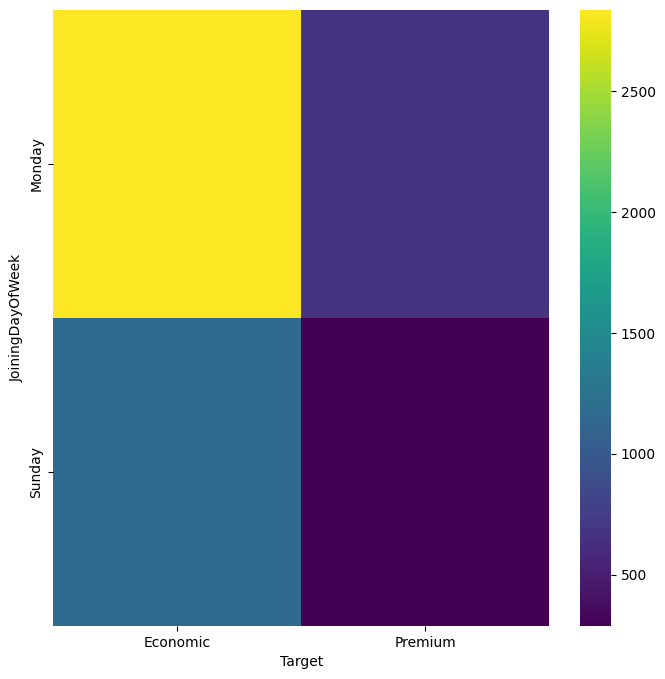

In [743]:
# @title Target vs JoiningDayOfWeek

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['JoiningDayOfWeek'].value_counts()
    for x_label, grp in df.groupby('Target')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Target')
_ = plt.ylabel('JoiningDayOfWeek')

In [744]:
df['prize_per_order_quantity'] = df['TotalOrderValue']/df['OrderQuantity']
df['prize_per_order_quantity']

0        33.276000
1        22.291111
2       137.438333
3        46.411250
4       199.622000
           ...    
4995    153.955000
4996    140.375000
4997    713.030000
4998     36.151667
4999    187.824000
Name: prize_per_order_quantity, Length: 4950, dtype: float64

In [745]:
df.columns

Index(['UserID', 'Gender', 'Age', 'JoiningDate', 'Location', 'OrderQuantity',
       'TotalOrderValue', 'DiscountApplied', 'Target', 'JoiningYear',
       'JoiningMonth', 'JoiningDay', 'JoiningDayOfWeek', 'IsWeekend',
       'JoiningWeek', 'Amount_after_discount', 'discount_prize', 'AgeBucket',
       'prize_per_order_quantity'],
      dtype='object')

In [746]:
column= [ 'Gender', 'Age', 'JoiningDate', 'Location', 'OrderQuantity',
       'TotalOrderValue', 'DiscountApplied', 'Target', 'JoiningYear',
       'JoiningMonth', 'JoiningDay', 'JoiningDayOfWeek', 'IsWeekend',
       'AgeBucket']

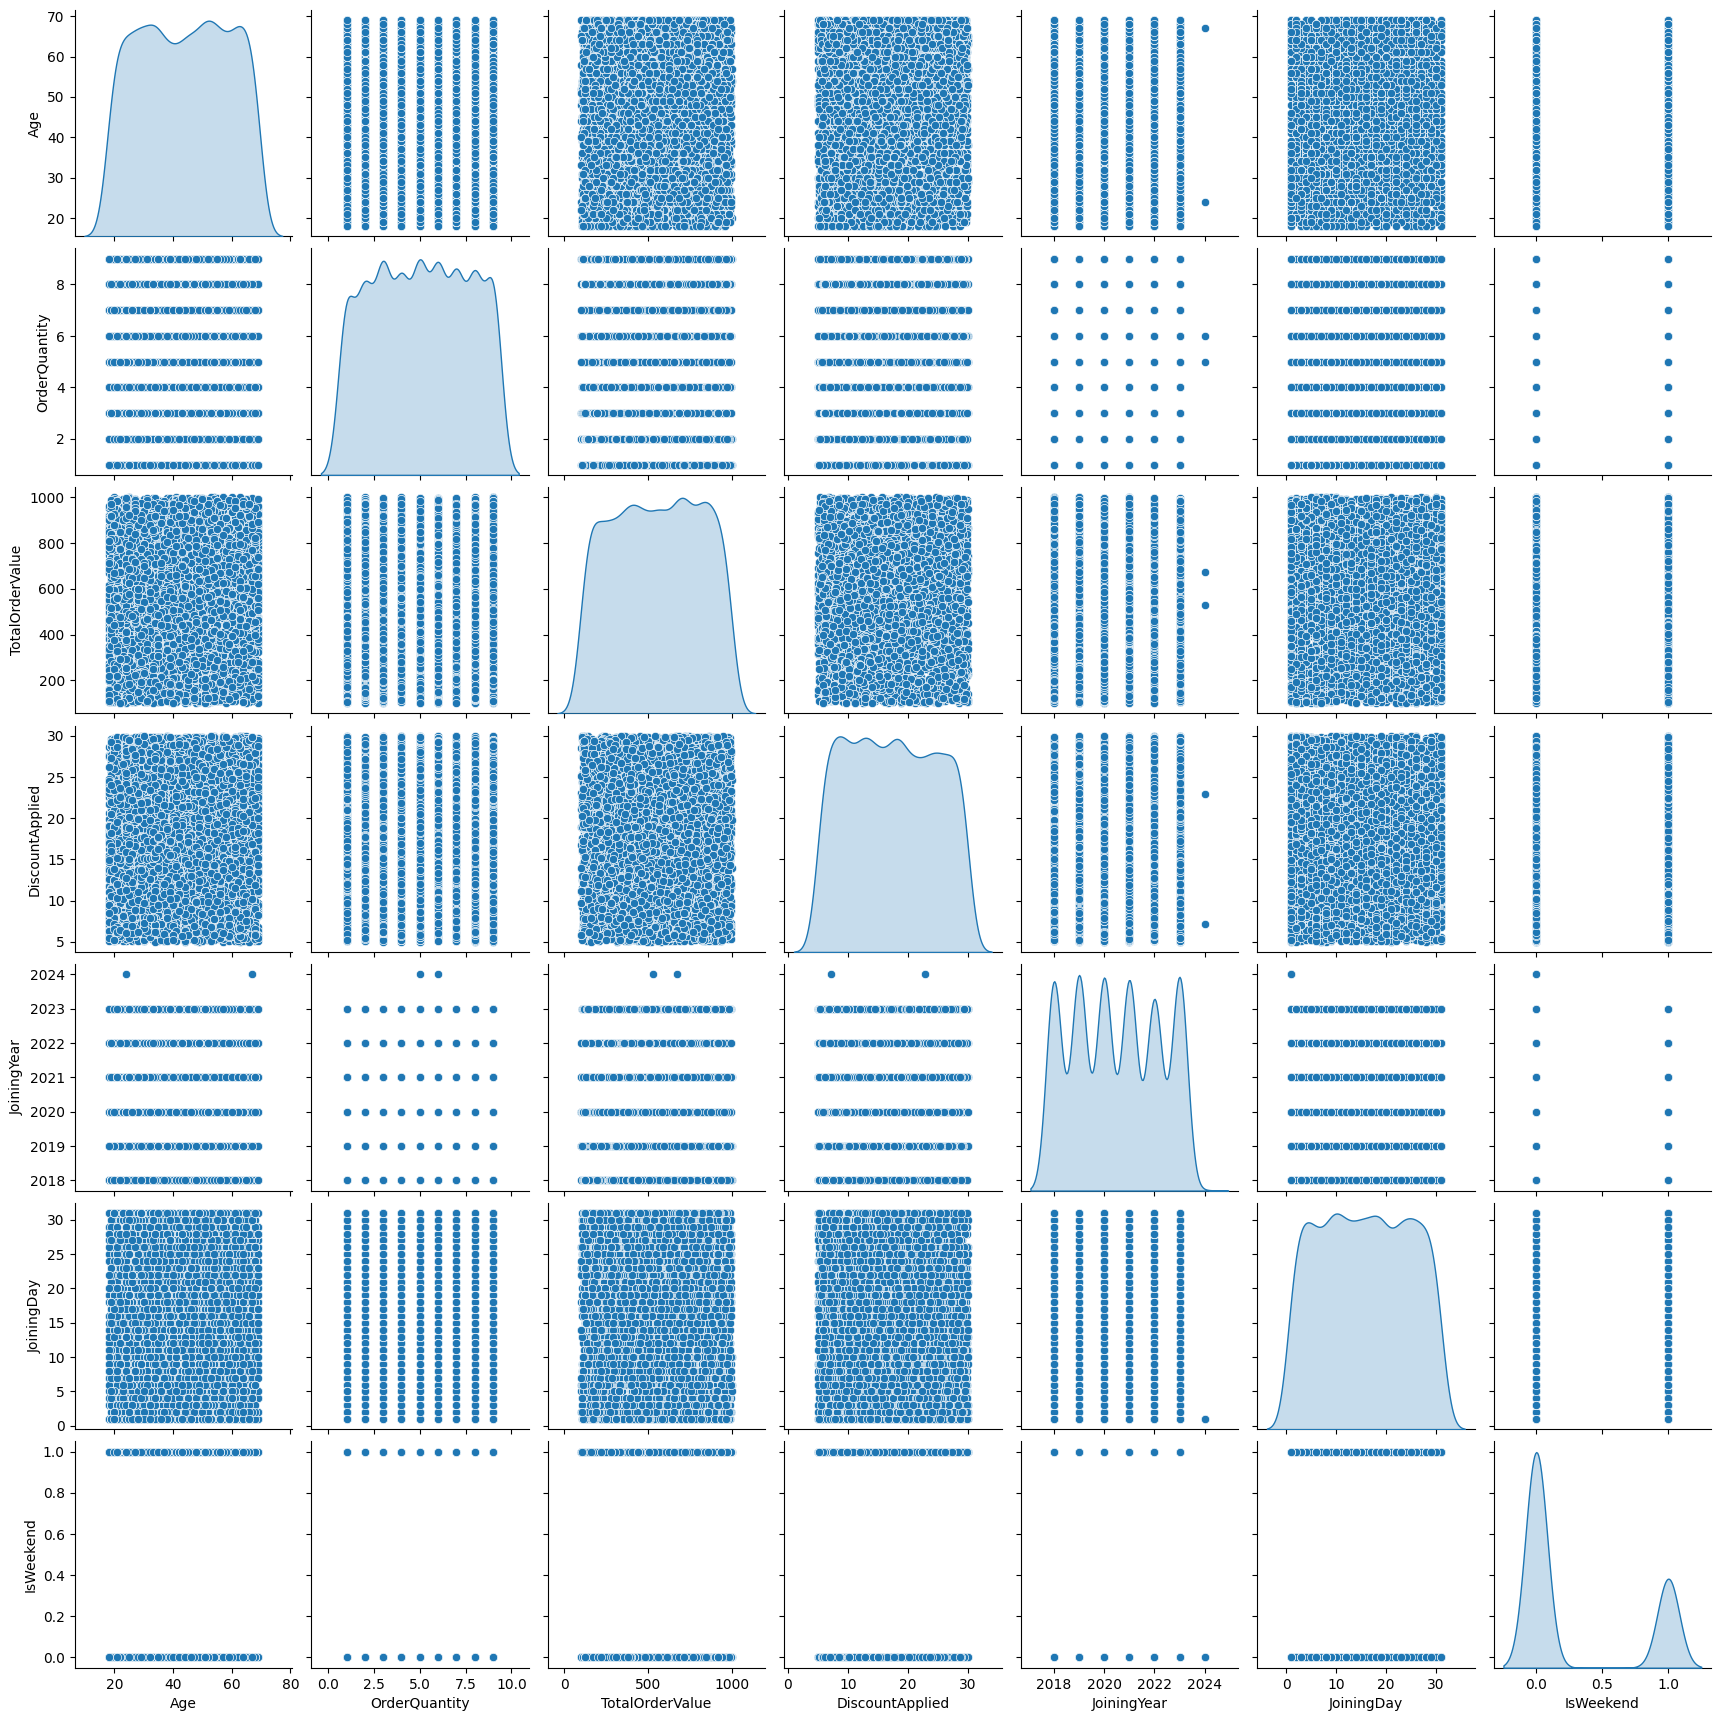

In [747]:
# Selecting a subset of columns for visualization
columns_to_visualize = ['Age', 'OrderQuantity', 'TotalOrderValue', 'JoiningYear', 'IsWeekend', 'AgeBucket']

# Create pair plot
sns.pairplot(df[column], diag_kind='kde')
plt.show()

In [748]:
df['prize_per_quantity_on_discount'] = df['Amount_after_discount']/df['OrderQuantity']
df['prize_per_quantity_on_discount']

0        29.442605
1        19.399954
2       107.682934
3        43.185668
4       158.320208
           ...    
4995    126.627988
4996    100.129487
4997    652.422450
4998     32.471427
4999    165.266338
Name: prize_per_quantity_on_discount, Length: 4950, dtype: float64

In [749]:
df[['prize_per_quantity_on_discount','prize_per_order_quantity']]

prize_per_quantity_on_discount  prize_per_order_quantity
0                          29.442605                 33.276000
1                          19.399954                 22.291111
2                         107.682934                137.438333
3                          43.185668                 46.411250
4                         158.320208                199.622000
...                              ...                       ...
4995                      126.627988                153.955000
4996                      100.129487                140.375000
4997                      652.422450                713.030000
4998                       32.471427                 36.151667
4999                      165.266338                187.824000

[4950 rows x 2 columns]

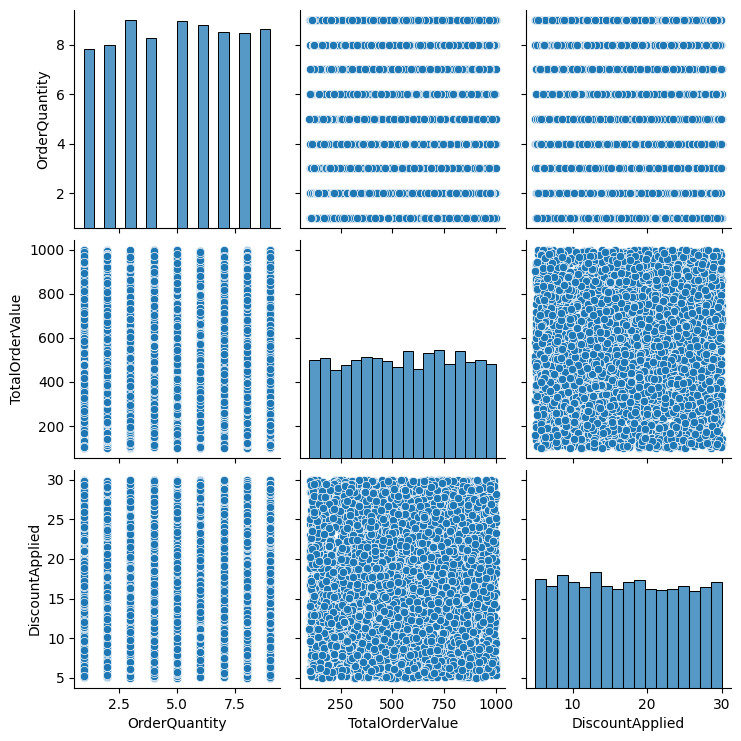

In [750]:
numerical_variables = ['OrderQuantity', 'TotalOrderValue', 'DiscountApplied']

# Create scatterplots for all combinations of numerical variables
sns.pairplot(df[numerical_variables])
plt.show()

The range of covariance values depends on the scale of the variables being analyzed. Since covariance is a measure of how much two variables change together, its magnitude can vary widely based on the units of measurement.

In [751]:
# Selecting numerical variables
numerical_variables = ['OrderQuantity', 'TotalOrderValue', 'DiscountApplied']

# Calculate covariance between pairs of numerical variables
covariance_matrix = df[numerical_variables].cov()

# Extracting covariance values for chosen pairs of variables
covariance_X1_X2 = covariance_matrix.loc['OrderQuantity', 'TotalOrderValue']
covariance_X2_X3 = covariance_matrix.loc['TotalOrderValue', 'DiscountApplied']
covariance_X1_X3 = covariance_matrix.loc['OrderQuantity', 'DiscountApplied']

# Display computed covariance values
print("Cov(OrderQuantity, TotalOrderValue):", covariance_X1_X2)
print("Cov(TotalOrderValue, DiscountApplied):", covariance_X2_X3)
print("Cov(OrderQuantity, DiscountApplied):", covariance_X1_X3)

Cov(OrderQuantity, TotalOrderValue): 9.527045755595967
Cov(TotalOrderValue, DiscountApplied): -5.319291499068292
Cov(OrderQuantity, DiscountApplied): 0.277365720245494


Cov(OrderQuantity, TotalOrderValue):

The positive covariance value (9.177) indicates a positive relationship between 'OrderQuantity' and 'TotalOrderValue'.
This suggests that as the quantity of orders increases, the total order value tends to increase as well.
The relatively high covariance value implies a moderate to strong positive linear relationship between the two variables.
Cov(TotalOrderValue, DiscountApplied):

The negative covariance value (-5.051) indicates a negative relationship between 'TotalOrderValue' and 'DiscountApplied'.
This suggests that as the total order value increases, the discount applied tends to decrease, and vice versa.
The magnitude of the negative covariance value indicates a moderate negative linear relationship between the two variables.
Cov(OrderQuantity, DiscountApplied):

The positive covariance value (0.244) indicates a weak positive relationship between 'OrderQuantity' and 'DiscountApplied'.
However, the magnitude of this covariance is relatively small compared to the other pairs, suggesting a weak linear relationship between the two variables.
This implies that there may be minimal influence of order quantity on the discount applied, or vice versa.

In [752]:
mean_values = df[numerical_variables].mean()
std_values = df[numerical_variables].std()

# Display the calculated mean and standard deviation
print("Mean values:")
print(mean_values)
print("\nStandard deviation values:")
print(std_values)

Mean values:
OrderQuantity        5.061616
TotalOrderValue    552.597444
DiscountApplied     17.329531
dtype: float64

Standard deviation values:
OrderQuantity        2.550370
TotalOrderValue    258.420514
DiscountApplied      7.237387
dtype: float64


Here are interpretations of the mean and standard deviation values for the three chosen numerical variables:

Order Quantity:

Mean: The average quantity of items ordered per transaction is approximately 5.06.
Standard Deviation: The standard deviation of approximately 2.55 indicates that the quantity of items ordered per transaction varies around the mean by approximately 2.55 units.
Interpretation: The mean value of 5.06 suggests that, on average, customers tend to order around 5 items per transaction. The standard deviation of 2.55 indicates moderate variability around this average, implying that while most transactions involve around 5 items, there are some transactions with significantly fewer or more items.
Total Order Value:

Mean: The average total order value per transaction is approximately $552.79.
Standard Deviation: The standard deviation of approximately $258.32 indicates that the total order value per transaction varies around the mean by approximately $258.32.
Interpretation: The mean value of $552.79 suggests that, on average, transactions result in a total order value of around $552.79. The standard deviation of $258.32 indicates considerable variability in total order values, with some transactions having significantly lower or higher values compared to the average.
Discount Applied:

Mean: The average discount applied per transaction is approximately 17.34.
Standard Deviation: The standard deviation of approximately 7.24 indicates that the discount applied per transaction varies around the mean by approximately 7.24 units.
Interpretation: The mean value of 17.34 suggests that, on average, a discount of approximately 17.34 units (e.g., percentage points or currency) is applied per transaction. The standard deviation of 7.24 indicates moderate variability in the discount applied, with some transactions receiving higher or lower discounts compared to the average.
Overall, these interpretations provide insights into the typical values and variability of the chosen numerical variables in the dataset, which can be useful for understanding customer behavior, identifying trends, and making informed business decisions.

In [753]:
df['TotalOrderValue'].describe()

count    4950.000000
mean      552.597444
std       258.420514
min       100.130000
25%       332.097500
50%       557.115000
75%       775.820000
max       999.980000
Name: TotalOrderValue, dtype: float64

In [754]:
bins = [-float('inf'), 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
labels = ['less than 100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000 and above']

df['TotalOrderValueBucket'] = pd.cut(df['TotalOrderValue'], bins=bins, labels=labels, right=False)
df['TotalOrderValueBucket']

0        100-200
1        200-300
2        800-900
3        300-400
4       900-1000
          ...   
4995     300-400
4996     500-600
4997     700-800
4998     200-300
4999    900-1000
Name: TotalOrderValueBucket, Length: 4950, dtype: category
Categories (11, object): ['less than 100' < '100-200' < '200-300' < '300-400' ... '700-800' < '800-900' <
                          '900-1000' < '1000 and above']

Corelation

In [755]:
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix

<ipython-input-755-aa31f7d206ac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


UserID       Age  OrderQuantity  \
UserID                          1.000000  0.000692       0.001233   
Age                             0.000692  1.000000       0.001954   
OrderQuantity                   0.001233  0.001954       1.000000   
TotalOrderValue                -0.017900 -0.011423       0.014455   
DiscountApplied                -0.004100  0.013835       0.015027   
JoiningYear                    -0.001460 -0.000830       0.015187   
JoiningDay                      0.025144  0.009415       0.015221   
IsWeekend                      -0.008738  0.010971       0.004675   
Amount_after_discount          -0.017126 -0.011748       0.009424   
discount_prize                 -0.014097 -0.006158       0.026650   
prize_per_order_quantity       -0.001321 -0.001924      -0.658151   
prize_per_quantity_on_discount -0.002130 -0.000699      -0.653506   

                                TotalOrderValue  DiscountApplied  JoiningYear  \
UserID                                -0.017900        -0.004100    -0.001460   
Age                                   -0.011423         0.013835    -0.000830   
OrderQuantity                          0.014455         0.015027     0.015187   
TotalOrderValue                        1.000000        -0.002844     0.021662   
DiscountApplied                       -0.002844         1.000000     0.007714   
JoiningYear                            0.021662         0.007714     1.000000   
JoiningDay                            -0.001195         0.017223     0.011283   
IsWeekend                             -0.012074         0.023309    -0.008228   
Amount_after_discount                  0.979127        -0.186944     0.021021   
discount_prize                         0.709965         0.636071     0.016035   
prize_per_order_quantity               0.442581        -0.011349    -0.002522   
prize_per_quantity_on_discount         0.439972        -0.095283    -0.002150   

                                JoiningDay  IsWeekend  Amount_after_discount  \
UserID                            0.025144  -0.008738              -0.017126   
Age                               0.009415   0.010971              -0.011748   
OrderQuantity                     0.015221   0.004675               0.009424   
TotalOrderValue                  -0.001195  -0.012074               0.979127   
DiscountApplied                   0.017223   0.023309              -0.186944   
JoiningYear                       0.011283  -0.008228               0.021021   
JoiningDay                        1.000000  -0.019299              -0.004822   
IsWeekend                        -0.019299   1.000000              -0.017719   
Amount_after_discount            -0.004822  -0.017719               1.000000   
discount_prize                    0.011803   0.011861               0.552009   
prize_per_order_quantity         -0.017655  -0.015816               0.436778   
prize_per_quantity_on_discount   -0.019610  -0.019441               0.453135   

                                discount_prize  prize_per_order_quantity  \
UserID                               -0.014097                 -0.001321   
Age                                  -0.006158                 -0.001924   
OrderQuantity                         0.026650                 -0.658151   
TotalOrderValue                       0.709965                  0.442581   
DiscountApplied                       0.636071                 -0.011349   
JoiningYear                           0.016035                 -0.002522   
JoiningDay                            0.011803                 -0.017655   
IsWeekend                             0.011861                 -0.015816   
Amount_after_discount                 0.552009                  0.436778   
discount_prize                        1.000000                  0.302315   
prize_per_order_quantity              0.302315                  1.000000   
prize_per_quantity_on_discount        0.234937                  0.992511   

                                prize_per_quantity_o

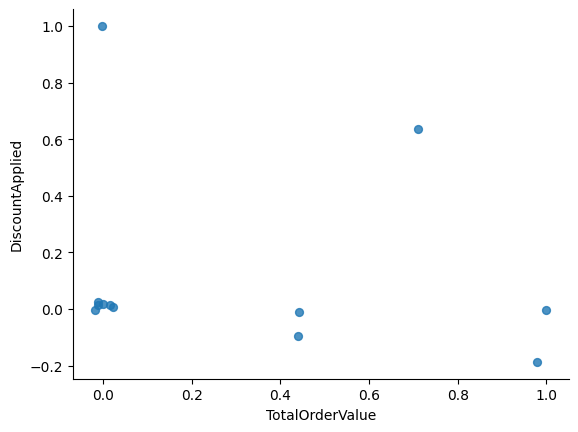

In [756]:
# @title TotalOrderValue vs DiscountApplied

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='TotalOrderValue', y='DiscountApplied', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

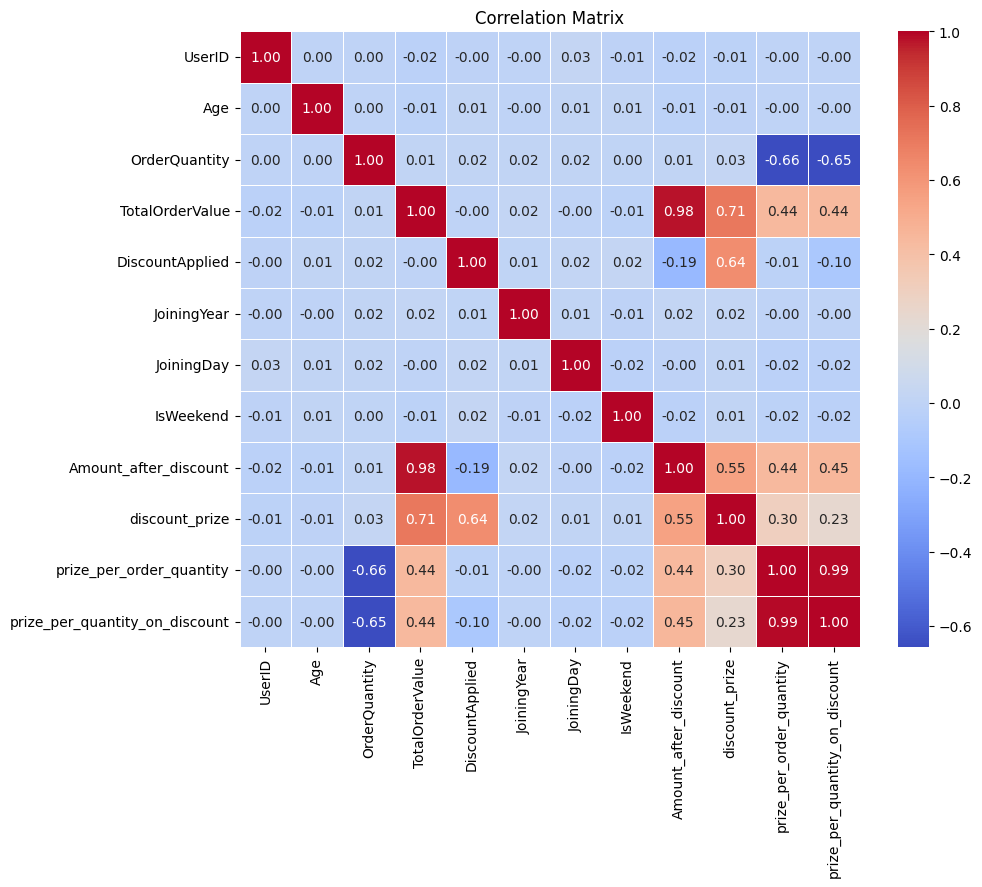

In [757]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Logistic Regression

This code performs the following steps:

Splits the dataset into features (X) and the target variable (y).
Splits the data into training and testing sets using train_test_split.
Initializes a logistic regression model.
Fits the model to the training data using fit.
Predicts the target variable on the testing data using predict.
Evaluates the model using confusion matrix and classification report.

In [758]:
df.isnull().sum()

UserID                              0
Gender                              0
Age                                 0
JoiningDate                         0
Location                            0
OrderQuantity                       0
TotalOrderValue                     0
DiscountApplied                     0
Target                              0
JoiningYear                         0
JoiningMonth                        0
JoiningDay                          0
JoiningDayOfWeek                    0
IsWeekend                           0
JoiningWeek                       112
Amount_after_discount               0
discount_prize                      0
AgeBucket                           0
prize_per_order_quantity            0
prize_per_quantity_on_discount      0
TotalOrderValueBucket               0
dtype: int64

In [759]:
df_dummies = pd.get_dummies(df)
df_dummies

UserID  Age JoiningDate  OrderQuantity  TotalOrderValue  \
0          1   30  2023-10-29              5           166.38   
1          2   41  2020-07-22              9           200.62   
2          3   38  2023-06-02              6           824.63   
3          4   62  2018-02-14              8           371.29   
4          5   60  2020-02-24              5           998.11   
...      ...  ...         ...            ...              ...   
4995    4996   35  2019-10-31              2           307.91   
4996    4997   21  2021-12-08              4           561.50   
4997    4998   18  2019-07-08              1           713.03   
4998    4999   67  2019-12-19              6           216.91   
4999    5000   37  2018-05-20              5           939.12   

      DiscountApplied  JoiningYear  JoiningDay  IsWeekend  \
0               11.52         2023          29          1   
1               12.97         2020          22          0   
2               21.65         2023           2          0   
3                6.95         2018          14          0   
4               20.69         2020          24          0   
...               ...          ...         ...        ...   
4995            17.75         2019          31          0   
4996            28.67         2021           8          0   
4997             8.50         2019           8          0   
4998            10.18         2019          19          0   
4999            12.01         2018          20          1   

      Amount_after_discount  ...  TotalOrderValueBucket_100-200  \
0                147.213024  ...                              1   
1                174.599586  ...                              0   
2                646.097605  ...                              0   
3                345.485345  ...                              0   
4                791.601041  ...                              0   
...                     ...  ...                            ...   
4995             253.255975  ...                              0   
4996             400.517950  ...                              0   
4997             652.422450  ...                              0   
4998             194.828562  ...                              0   
4999             826.331688  ...                              0   

      TotalOrderValueBucket_200-300  TotalOrderValueBucket_300-400  \
0                                 0                              0   
1                                 1                              0   
2                                 0                              0   
3                                 0                              1   
4                                 0                              0   
...                             ...                            ...   
4995                              0                              1   
4996                              0                              0   
4997                              0                              0   
4998                              1                              0   
4999                              0                              0   

      TotalOrderValueBucket_400-500  TotalOrderValueBucket_500-600  \
0                                 0                              0   
1                                 0                              0   
2                                 0                              0   
3                                 0                              0   
4                                 0                              0   
...                             ...                            ...   
4995                              0                              0   
4996                              0                              1   
4997                              0                              0   
4998                              0                              0   
4999                              0                              0   

     

In [760]:
df['Target'].value_counts()

Economic    3993
Premium      957
Name: Target, dtype: int64

In [761]:
target_mapping = {'Economic': 1, 'Premium':0}
df['Target_binary'] = df['Target'].map(target_mapping)
df[['Target_binary','Target']]

Target_binary    Target
0                 0   Premium
1                 1  Economic
2                 1  Economic
3                 1  Economic
4                 0   Premium
...             ...       ...
4995              1  Economic
4996              1  Economic
4997              1  Economic
4998              1  Economic
4999              1  Economic

[4950 rows x 2 columns]

In [762]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

In [763]:
df.columns

Index(['UserID', 'Gender', 'Age', 'JoiningDate', 'Location', 'OrderQuantity',
       'TotalOrderValue', 'DiscountApplied', 'Target', 'JoiningYear',
       'JoiningMonth', 'JoiningDay', 'JoiningDayOfWeek', 'IsWeekend',
       'JoiningWeek', 'Amount_after_discount', 'discount_prize', 'AgeBucket',
       'prize_per_order_quantity', 'prize_per_quantity_on_discount',
       'TotalOrderValueBucket', 'Target_binary'],
      dtype='object')

In [764]:
X = df.drop(columns=['UserID', 'Target_binary','Target'])
y = df['Target']

In [765]:
X.head()

Gender  Age JoiningDate  Location  OrderQuantity  TotalOrderValue  \
0      F   30  2023-10-29  Suburban              5           166.38   
1      F   41  2020-07-22  Suburban              9           200.62   
2      F   38  2023-06-02     Rural              6           824.63   
3      M   62  2018-02-14  Suburban              8           371.29   
4      M   60  2020-02-24  Suburban              5           998.11   

   DiscountApplied  JoiningYear JoiningMonth  JoiningDay JoiningDayOfWeek  \
0            11.52         2023      October          29           Sunday   
1            12.97         2020         July          22           Monday   
2            21.65         2023         June           2           Monday   
3             6.95         2018     February          14           Monday   
4            20.69         2020     February          24           Monday   

   IsWeekend  JoiningWeek  Amount_after_discount  discount_prize  \
0          1   fifth week             147.213024       19.166976   
1          0  fourth week             174.599586       26.020414   
2          0   first week             646.097605      178.532395   
3          0  second week             345.485345       25.804655   
4          0  fourth week             791.601041      206.508959   

          AgeBucket  prize_per_order_quantity  prize_per_quantity_on_discount  \
0      30 to 35 yrs                 33.276000                       29.442605   
1      41 to 45 yrs                 22.291111                       19.399954   
2      36 to 40 yrs                137.438333                      107.682934   
3  More than 55 yrs                 46.411250                       43.185668   
4  More than 55 yrs                199.622000                      158.320208   

  TotalOrderValueBucket  
0               100-200  
1               200-300  
2               800-900  
3               300-400  
4              900-1000

In [766]:
X.shape

(4950, 19)

In [767]:
y

0        Premium
1       Economic
2       Economic
3       Economic
4        Premium
          ...   
4995    Economic
4996    Economic
4997    Economic
4998    Economic
4999    Economic
Name: Target, Length: 4950, dtype: object

In [768]:
y.shape

(4950,)

In [769]:
X.columns

Index(['Gender', 'Age', 'JoiningDate', 'Location', 'OrderQuantity',
       'TotalOrderValue', 'DiscountApplied', 'JoiningYear', 'JoiningMonth',
       'JoiningDay', 'JoiningDayOfWeek', 'IsWeekend', 'JoiningWeek',
       'Amount_after_discount', 'discount_prize', 'AgeBucket',
       'prize_per_order_quantity', 'prize_per_quantity_on_discount',
       'TotalOrderValueBucket'],
      dtype='object')

In [770]:
X.dtypes

Gender                                    object
Age                                        int64
JoiningDate                       datetime64[ns]
Location                                  object
OrderQuantity                              int64
TotalOrderValue                          float64
DiscountApplied                          float64
JoiningYear                                int64
JoiningMonth                              object
JoiningDay                                 int64
JoiningDayOfWeek                          object
IsWeekend                                  int64
JoiningWeek                             category
Amount_after_discount                    float64
discount_prize                           float64
AgeBucket                               category
prize_per_order_quantity                 float64
prize_per_quantity_on_discount           float64
TotalOrderValueBucket                   category
dtype: object

In [771]:
col_to_be_categorical = ['Gender', 'Location', 'AgeBucket','JoiningDate',
       'JoiningYear', 'JoiningMonth', 'JoiningDay', 'JoiningDayOfWeek',
       'IsWeekend','Age','TotalOrderValueBucket','JoiningWeek']
X[col_to_be_categorical] = X[col_to_be_categorical].astype('object')

In [772]:
X.dtypes

Gender                             object
Age                                object
JoiningDate                        object
Location                           object
OrderQuantity                       int64
TotalOrderValue                   float64
DiscountApplied                   float64
JoiningYear                        object
JoiningMonth                       object
JoiningDay                         object
JoiningDayOfWeek                   object
IsWeekend                          object
JoiningWeek                        object
Amount_after_discount             float64
discount_prize                    float64
AgeBucket                          object
prize_per_order_quantity          float64
prize_per_quantity_on_discount    float64
TotalOrderValueBucket              object
dtype: object

In [773]:
X['JoiningMonth']

0        October
1           July
2           June
3       February
4       February
          ...   
4995     October
4996    December
4997        July
4998    December
4999         May
Name: JoiningMonth, Length: 4950, dtype: object

In [774]:
# Selecting categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = ['OrderQuantity','TotalOrderValue','DiscountApplied','prize_per_order_quantity','discount_prize','Amount_after_discount']
X_num = X[numeric_cols]
X_cat = X[categorical_cols]

In [775]:
numeric_cols

['OrderQuantity',
 'TotalOrderValue',
 'DiscountApplied',
 'prize_per_order_quantity',
 'discount_prize',
 'Amount_after_discount']

In [776]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('to_str', FunctionTransformer(lambda x: x.astype(str), validate=False)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [777]:
preprocessor = ColumnTransformer( # bucketing other for columns
    transformers=[
        ('num', numerical_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=100000,class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) # Previous result
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6353535353535353
Confusion Matrix:
[[583 221]
 [140  46]]
Classification Report:
              precision    recall  f1-score   support

    Economic       0.81      0.73      0.76       804
     Premium       0.17      0.25      0.20       186

    accuracy                           0.64       990
   macro avg       0.49      0.49      0.48       990
weighted avg       0.69      0.64      0.66       990



In [778]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_train_pred, zero_division=1))

Training Accuracy: 0.8083333333333333

Classification Report for Training Set:
              precision    recall  f1-score   support

    Economic       0.96      0.79      0.87      3189
     Premium       0.50      0.88      0.64       771

    accuracy                           0.81      3960
   macro avg       0.73      0.84      0.76      3960
weighted avg       0.87      0.81      0.82      3960



In [779]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report for Testing Set:")
print(classification_report(y_test, y_test_pred, zero_division=1))

Testing Accuracy: 0.6353535353535353

Classification Report for Testing Set:
              precision    recall  f1-score   support

    Economic       0.81      0.73      0.76       804
     Premium       0.17      0.25      0.20       186

    accuracy                           0.64       990
   macro avg       0.49      0.49      0.48       990
weighted avg       0.69      0.64      0.66       990



In [780]:
logistic_regression_model = model.named_steps['classifier']

column_transformer = model.named_steps['preprocessor']
categorical_encoder = column_transformer.named_transformers_['cat'].named_steps['onehot']
categorical_feature_names = list(categorical_encoder.get_feature_names_out(categorical_cols))

all_feature_names = numeric_cols + categorical_feature_names  # Remove .tolist()

coefficients_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': logistic_regression_model.coef_[0]})
sorted_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
sorted_df

Feature  Coefficient
470   JoiningDate_2019-05-01 00:00:00     1.630944
1446  JoiningDate_2022-07-07 00:00:00     1.540556
482   JoiningDate_2019-05-13 00:00:00     1.518480
693   JoiningDate_2020-01-15 00:00:00     1.510056
742   JoiningDate_2020-03-16 00:00:00     1.481651
...                               ...          ...
1804  JoiningDate_2023-09-18 00:00:00    -0.923456
1316  JoiningDate_2022-01-18 00:00:00    -0.938419
1295  JoiningDate_2021-12-24 00:00:00    -0.983483
87    JoiningDate_2018-01-29 00:00:00    -1.015662
700   JoiningDate_2020-01-23 00:00:00    -1.054995

[1966 rows x 2 columns]

#Random Forest Classifier

In [784]:
model_random_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=1000))
])

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
model_random_forest.fit(X_train_rf, y_train_rf)

# Make predictions
y_pred_rf = model_random_forest.predict(X_test_rf)

# Calculate accuracy
accuracy = accuracy_score(y_test_rf, y_pred_rf)
conf_matrix = confusion_matrix(y_test_rf, y_pred_rf)
classification_rep = classification_report(y_test_rf, y_pred_rf)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8131313131313131
Confusion Matrix:
[[804   0]
 [185   1]]
Classification Report:
              precision    recall  f1-score   support

    Economic       0.81      1.00      0.90       804
     Premium       1.00      0.01      0.01       186

    accuracy                           0.81       990
   macro avg       0.91      0.50      0.45       990
weighted avg       0.85      0.81      0.73       990



In [782]:
# Predictions
y_train_pred_rf = model_random_forest.predict(X_train_rf)

train_accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print("Training Accuracy:", train_accuracy)
print("\nClassification Report for Training Set:")
print(classification_report(y_train_rf, y_train_pred_rf, zero_division=1))

Training Accuracy: 1.0

Classification Report for Training Set:
              precision    recall  f1-score   support

    Economic       1.00      1.00      1.00      3189
     Premium       1.00      1.00      1.00       771

    accuracy                           1.00      3960
   macro avg       1.00      1.00      1.00      3960
weighted avg       1.00      1.00      1.00      3960



In [785]:
y_test_pred_rf = model_random_forest.predict(X_test_rf)

test_accuracy = accuracy_score(y_test_rf, y_pred_rf)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report for Testing Set:")
print(classification_report(y_test_rf, y_test_pred_rf, zero_division=1))

Testing Accuracy: 0.8131313131313131

Classification Report for Testing Set:
              precision    recall  f1-score   support

    Economic       0.81      1.00      0.90       804
     Premium       1.00      0.01      0.01       186

    accuracy                           0.81       990
   macro avg       0.91      0.50      0.45       990
weighted avg       0.85      0.81      0.73       990

